# A Cursory Data based exploration into Counter Strike's Top 20 Teams utilizing Web Scraping

#### Esports is a rapidly expanding industry which brings a multitude of unique opportunities for expeditionary journeys into the wealth of data that is present in the digital landscape. The purpose of this report is to dive into the players on HLTV's top twenty list as of july 31st. It will be a deep dive into the individual efforts of said players over the last three months, filtered out for lan competition versus other top twenty players.  This timeline is essentially from IEM Sydney onwards

###### The framework utilized to scrape the data was the requests library and beautiful soup. I then used pandas in order to collate the data and visualize it


In the code cell below I start off by importing all the libraries that are necessary in order to gather all the data together.

In [17]:
import numpy
from bs4 import BeautifulSoup 
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import time

After importing the libraries I set up the folder upon which I will be dumping all the files that contain all the statistical information for all the players. Each player will have an individual file saved with his name

In [12]:
folder_name = 'cs_go_raw_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

I then set up a data structure which contains a list of the links to each of the players stats. A point of optimization/further improvement would be the automation of the process of actually collating these links. 

In [71]:
cs_go_raw_data_urls = ['https://www.hltv.org/stats/players/8738/EliGE',
                      'https://www.hltv.org/stats/players/7687/nitr0',
                      'https://www.hltv.org/stats/players/8520/NAF',
                      'https://www.hltv.org/stats/players/8797/Stewie2K',
                      'https://www.hltv.org/stats/players/10394/Twistzz',
                      'https://www.hltv.org/stats/players/7168/NBK-',
                      'https://www.hltv.org/stats/players/7169/RpK',
                      'https://www.hltv.org/stats/players/7322/apEX',
                       'https://www.hltv.org/stats/players/8184/ALEX',
                       'https://www.hltv.org/stats/players/11893/ZywOo',
                       'https://www.hltv.org/stats/players/4954/Xyp9x',
                       'https://www.hltv.org/stats/players/7398/dupreeh',
                        'https://www.hltv.org/stats/players/7592/device',
                       'https://www.hltv.org/stats/players/7412/gla1ve',
                       'https://www.hltv.org/stats/players/9032/Magisk',
                       'https://www.hltv.org/stats/players/695/allu',
                       'https://www.hltv.org/stats/players/4076/Aerial',
                       'https://www.hltv.org/stats/players/7248/xseveN',
                       'https://www.hltv.org/stats/players/9816/Aleksib',
                       'https://www.hltv.org/stats/players/11916/sergej',
                       'https://www.hltv.org/stats/players/8507/stanislaw',
                       'https://www.hltv.org/stats/players/8523/tarik',
                       'https://www.hltv.org/stats/players/9136/Brehze',
                       'https://www.hltv.org/stats/players/10671/Ethan',
                       'https://www.hltv.org/stats/players/11219/CeRq',
                       'https://www.hltv.org/stats/players/165/NEO',
                       'https://www.hltv.org/stats/players/885/olofmeister',
                       'https://www.hltv.org/stats/players/2757/GuardiaN',
                       'https://www.hltv.org/stats/players/3741/NiKo',
                       'https://www.hltv.org/stats/players/8183/rain',
                       'https://www.hltv.org/stats/players/484/Zeus',
                       'https://www.hltv.org/stats/players/7594/flamie',
                       'https://www.hltv.org/stats/players/7998/s1mple',
                       'https://www.hltv.org/stats/players/8918/electronic',
                       'https://www.hltv.org/stats/players/11840/Boombl4',
                       'https://www.hltv.org/stats/players/284/JaCkz',
                       'https://www.hltv.org/stats/players/1225/shox',
                       'https://www.hltv.org/stats/players/7167/kennyS',
                       'https://www.hltv.org/stats/players/9616/AmaNEk',
                       'https://www.hltv.org/stats/players/13497/Lucky',
                       'https://www.hltv.org/stats/players/12521/arT',
                       'https://www.hltv.org/stats/players/12553/yuurih',
                       'https://www.hltv.org/stats/players/12822/VINI',
                       'https://www.hltv.org/stats/players/15631/KSCERATO',
                       'https://www.hltv.org/stats/players/16770/ableJ',
                       'https://www.hltv.org/stats/players/429/karrigan',
                       'https://www.hltv.org/stats/players/2730/chrisJ',
                       'https://www.hltv.org/stats/players/9960/frozen',
                       'https://www.hltv.org/stats/players/8574/woxic',
                       'https://www.hltv.org/stats/players/11816/ropz',
                       'https://www.hltv.org/stats/players/29/f0rest',
                       'https://www.hltv.org/stats/players/39/GeT_RiGhT',
                       'https://www.hltv.org/stats/players/9261/Lekr0',
                       'https://www.hltv.org/stats/players/9278/REZ',
                       'https://www.hltv.org/stats/players/14218/Plopski',
                       'https://www.hltv.org/stats/players/8095/aizy',
                       'https://www.hltv.org/stats/players/8394/Kjaerbye',
                       'https://www.hltv.org/stats/players/8783/JUGi',
                       'https://www.hltv.org/stats/players/8875/gade',
                       'https://www.hltv.org/stats/players/9031/valde',
                       'https://www.hltv.org/stats/players/884/Xizt',
                       'https://www.hltv.org/stats/players/3849/JW',
                       'https://www.hltv.org/stats/players/7443/twist',
                       'https://www.hltv.org/stats/players/7528/KRIMZ',
                       'https://www.hltv.org/stats/players/13666/Brollan',
                       'https://www.hltv.org/stats/players/2023/FalleN',
                       'https://www.hltv.org/stats/players/9216/coldzera',
                       'https://www.hltv.org/stats/players/8564/fer',
                       'https://www.hltv.org/stats/players/8566/LUCAS1',
                       'https://www.hltv.org/stats/players/9217/TACO',
                       'https://www.hltv.org/stats/players/7148/friberg',
                       'https://www.hltv.org/stats/players/8611/es3tag',
                       'https://www.hltv.org/stats/players/9294/NaToSaphiX',
                       'https://www.hltv.org/stats/players/10994/stavn',
                       'https://www.hltv.org/stats/players/15165/blameF',
                       'https://www.hltv.org/stats/players/3972/huNter',
                       'https://www.hltv.org/stats/players/4216/LETN1',
                       'https://www.hltv.org/stats/players/9618/nexa',
                       'https://www.hltv.org/stats/players/11283/ottoNd',
                       'https://www.hltv.org/stats/players/12030/EspiranTo',
                       'https://www.hltv.org/stats/players/4679/jks',
                       'https://www.hltv.org/stats/players/8082/AZR',
                       'https://www.hltv.org/stats/players/8248/jkaem',
                       'https://www.hltv.org/stats/players/9686/Gratisfaction',
                       'https://www.hltv.org/stats/players/10588/Liazz',
                       'https://www.hltv.org/stats/players/7415/HUNDEN',
                       'https://www.hltv.org/stats/players/9612/Bubzkji',
                       'https://www.hltv.org/stats/players/9896/b0RUP',
                      'https://www.hltv.org/stats/players/10330/acoR',
                       'https://www.hltv.org/stats/players/14148/sjuush',
                       'https://www.hltv.org/stats/players/8370/mixwell',
                       'https://www.hltv.org/stats/players/8521/daps',
                       'https://www.hltv.org/stats/players/8735/autimatic',
                       'https://www.hltv.org/stats/players/9056/koosta',
                       'https://www.hltv.org/stats/players/13254/TenZ',
                       'https://www.hltv.org/stats/players/7156/MSL',
                       'https://www.hltv.org/stats/players/9078/k0nfig',
                       'https://www.hltv.org/stats/players/10264/niko',
                       'https://www.hltv.org/stats/players/10610/refrezh',
                       'https://www.hltv.org/stats/players/12018/TeSeS',
                      ]


Upon grabbing all the URL's I go through each link and append the appropriate filters to make sure that I get the correct type of data. I filter it out for individual data, and then make sure to filter for a three month time span over April 27th, in order to ensure all of IEM Sydney is grabbed, to July 31st. I also ensure that the data is grabbed for lan matches versus top 20 competition.

In [58]:
updated_urls = []
for url in cs_go_raw_data_urls:
    for x in range(len(url)):
        if(url[x].isdigit()):
            updated_urls.append(url[0 : x] + 'individual/' + url[x:] + '?startDate=2019-04-27&endDate=2019-07-31&matchType=Lan&rankingFilter=Top20')
            break

This next cell is where I utilize the requests library in order to make a call to each of the URL's. I then write the contents of that URL to the appropriate file in my directory.

In [65]:
for url in updated_urls:
    time.sleep(10)
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1].split('?')[0]), mode = 'wb') as file:
        file.write(response.content)

This cell is where I go through the contents of the file. The files that I have saved is simply the full html file of the webpage that is put on display on hltv. I then go through the working tree of it utilizing the beautiful soup library and strip away the contents for the specific statistics I want. I then collate that all together into one data structure which I will use to create a data frame.

In [19]:
df_cols = ['Name' , 'Kills' , 'Deaths', 'K / D' , 'Kill Per Round', 'Rounds With Kills' , 'K-D Differential' , 'Total Opening Kills', 'Total Opening Deaths',
           'Opening Kill Ratio' , 'Opening Kill Rating', 'Team Win Percent after First Kill', 'First Kill in Won Rounds %',
           '0 Kill Rounds', '1 Kill Rounds', '2 Kill Rounds', '3 Kill Rounds', '4 Kill Rounds', '5 Kill Rounds', 'Rifle Kills',
           'Sniper Kills', 'SMG Kills', 'Pistol Kills', 'Grenade', 'Other']
df_data = {}
for x in range(len(df_cols)):
    df_data.update({df_cols[x] : []})
for name in os.listdir(folder_name):
    with open(os.path.join(folder_name, name), encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'lxml')
        stats = soup.find_all('div', "stats-row")
        df_data['Name'].append(name)
        for x in range(len(stats)):
            df_data[df_cols[x + 1]].append(stats[x].find_all('span')[-1].text)

In the two cells below I create a pandas dataframe which is essentially just a tabular representation of our data which allows us extended functionality through simple commands.

In [20]:
df = pd.DataFrame(data = df_data)

The cell below displays the first five entries of our data set. As you can see it is currently in alphabetical order.

In [21]:
df.head()

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
0,ableJ,473,538,0.88,0.57,342,-65,49,53,0.92,...,80,15,7,0,356,4,30,75,7,3
1,acoR,115,121,0.95,0.57,86,-6,16,18,0.89,...,24,1,1,0,27,66,1,19,1,1
2,Aerial,733,771,0.95,0.65,500,-38,133,129,1.03,...,143,33,8,0,575,1,46,104,4,4
3,aizy,615,624,0.99,0.64,399,-9,98,103,0.95,...,110,39,8,1,445,37,34,90,7,3
4,Aleksib,666,749,0.89,0.59,468,-83,76,110,0.69,...,117,34,3,1,447,17,74,112,14,4


In the two cells below I convert appropriate columns to numerical formats. The two columns with percentages I strip away the percent signs and convert it into float definition

In [23]:
for x in list(df):
    if x != 'Name' and x != 'Team Win Percent after First Kill' and x != 'First Kill in Won Rounds %':
        df[x] = pd.to_numeric(df[x])

In [24]:
df['Team Win Percent after First Kill'] = df['Team Win Percent after First Kill'].str.replace(r'%', r'0').astype('float')
df['First Kill in Won Rounds %'] = df['First Kill in Won Rounds %'].str.replace(r'%', r'0').astype('float')

Here I create a bunch of dataframes that contain the same entry as the original dataframes but only sorted in the appropriate descending order by specific columns that I wish to filter by.

In [56]:
sorted_by_K_d = df.sort_values(by=['K / D'], ascending=False)
sorted_by_kpr = df.sort_values(by=['Kill Per Round'], ascending=False)
sorted_by_k_d_diff = df.sort_values(by=['K-D Differential'], ascending=False)
sorted_by_opening_kill_ratio = df.sort_values(by=['Opening Kill Ratio'], ascending=False)
sorted_by_opening_kill_rating = df.sort_values(by=['Opening Kill Rating'], ascending=False)
sorted_by_first_kill_in_won_rounds = df.sort_values(by=['First Kill in Won Rounds %'], ascending=False)

I start off by taking a look at the top 20 players in terms of Kill Death ratio over the last three months. 

In [27]:
sorted_by_K_d.head(20) 
#Interesting Notes: When looking at the type of people who remain at the highest end of the scene over the last 3 months are the ones who you typically envision as the star plaers within their teams
#and also generally some of the more mechanically talented players in general.

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
77,s1mple,560,401,1.40,0.84,349,159,90,57,1.58,...,104,41,7,1,193,258,16,85,4,4
98,ZywOo,1334,981,1.36,0.83,836,353,237,134,1.77,...,222,91,26,4,434,570,63,247,18,7
75,ropz,638,488,1.31,0.74,437,150,69,49,1.41,...,93,39,10,0,505,9,13,109,3,0
92,woxic,636,498,1.28,0.74,418,138,103,68,1.51,...,119,40,5,1,155,374,6,94,6,1
89,Twistzz,1525,1190,1.28,0.75,1003,335,155,164,0.95,...,277,82,23,3,1180,12,21,286,16,14
66,nexa,383,306,1.25,0.78,248,77,41,43,0.95,...,68,18,9,1,267,7,32,66,12,0
20,coldzera,418,336,1.24,0.79,275,82,49,24,2.04,...,77,23,4,2,307,11,21,77,3,1
49,kennyS,902,729,1.24,0.75,593,173,143,91,1.57,...,165,55,10,1,190,545,8,138,13,8
25,EliGE,1618,1318,1.23,0.79,1041,300,260,229,1.14,...,295,99,24,3,1291,7,83,218,13,6
22,device,520,427,1.22,0.76,349,93,97,54,1.80,...,95,21,10,1,188,222,16,87,6,1


# Analysis
This list is clearly extremely interesting. The thing that immediately jumps out to me is the impressive statistical performance of S1mple and ZywOo, both who stand out head and shoulders above even the rest of the impressive names that comprise this list. ZyWoo stands out even more when you take into account the sheer volume that he has produced at this K/D level, he has double S1mple's kills while maintaining a mindboggling K/D level. However ZyWoo's impressive statistical performance is not sufficient enough to take away from S1mple's shine, as S1mple managed to create nearly the same gap, in terms of K/D ratio, between him and ZywOo as the gap that exists between ZywOo and the third place upon this list, Ropz. 

Anothear thing that immediately jumps out to me is the presence of both Ropz and Woxic at the forefront of the list, coming in at third and fourth respectively, with even more volume in terms of sample size then s1mple. Stastical dominance from these two star carries of Mousesports has been, without a doubt, one of the main factors in their almost meteoric rise up through the rankings, currently cracking HLTV's top 10 at 9th. I feel however that there place on this list might not exactly match up with the eye test over the last several months, especially when I take into account the inflated stats that they had on their march to the semis of ESL Pro League finals, where they were tragically laid to rest by Team Liquid in decisive fashion in the semi finals.

From there I immediately look to Twistzz and Elige's places within the top 10, clocking in at 5th and 9th respectively. Their presence within the list, especially at the high volume of rounds they had played over the last three months considering their imnumerable runs to finals at top tier events, without a doubt goes a long ways towards explaining exactly how Team Liquid managed to run roughshod on the rest of the scene. To make matters worse for the rest of the scene Naf also finds himself cracking this list, coming in at a very respectable position 18 when you consider over the large sample size of high level Counter Strike he, and Team Liquid, have found themselves embroiled in.

The final player I'd like to point too in this list is KennyS who has recently had a string of form that has made the entire Counter Strike reminisce of the old days. Considering G2's impressive results, especially within the context of their roster, KennyS's presence as the 8th ranked player is a testament to the load that he has carried over the last few months. I will be excited to see for how long Kennys can continue to reclaim the magic of the old days over the next few months, but I have my doubts that even with him fragging at a high rate the lack of support from his teammates, considering none of them find themselves within the 80th percentile or above in terms of K/D, could cause a downswing in G2's results over the upcoming tournaments. Howeverr if he keeps this up then perhaps one day the Counter Strike scene could be lucky enough to see kennyS and ZywOo unite and perhaps deliver the french magic that the whole scene wished to see from Shox and kennyS (though I do have some questions about the fit).

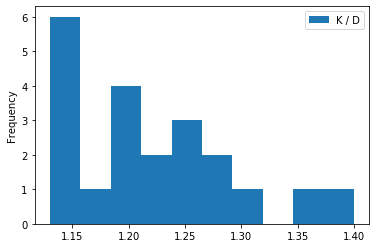

In [28]:
df[df['K / D'] >= 1.13].plot(x='Name', y= 'K / D', kind='hist');

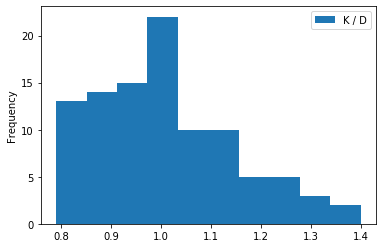

In [29]:
df.plot(x='Name', y= 'K / D', kind='hist')

In [30]:
df['K / D'].describe()

count    99.000000
mean      1.009899
std       0.137511
min       0.790000
25%       0.910000
50%       0.990000
75%       1.095000
max       1.400000
Name: K / D, dtype: float64

Above I have plotted two histograms showing the allocation of KD's and their frequency amongst the top 20 players and the top 100 alongside a few descriptive statistics in regards to the allocation of K/D. What we can see is that over 50% of the top 20 players actually have a negative K / D. The 75th percentile finds themselves right around 1.1 in K / D as well.

In [31]:
sorted_by_kpr.head(20) 
#What is interesting about this list is generally it looks very similar to the K/D list. However there are some players not present within the top 20 of the K/D list that are here
#like JW. These players tend to have impact per round but also have a lower K/D dude to the general aggressive nature of thier gameplay.
#Another interesting addition to the list is jks who doesnt pop up in the K/D list.

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
77,s1mple,560,401,1.40,0.84,349,159,90,57,1.58,...,104,41,7,1,193,258,16,85,4,4
98,ZywOo,1334,981,1.36,0.83,836,353,237,134,1.77,...,222,91,26,4,434,570,63,247,18,7
41,huNter,391,326,1.20,0.80,253,65,64,45,1.42,...,83,21,3,1,289,5,22,65,3,9
25,EliGE,1618,1318,1.23,0.79,1041,300,260,229,1.14,...,295,99,24,3,1291,7,83,218,13,6
20,coldzera,418,336,1.24,0.79,275,82,49,24,2.04,...,77,23,4,2,307,11,21,77,3,1
66,nexa,383,306,1.25,0.78,248,77,41,43,0.95,...,68,18,9,1,267,7,32,66,12,0
47,k0nfig,194,163,1.19,0.78,127,31,30,25,1.20,...,36,14,1,0,142,2,8,41,1,0
15,Brehze,1124,991,1.13,0.77,752,133,161,143,1.13,...,188,61,18,2,885,12,22,201,5,1
22,device,520,427,1.22,0.76,349,93,97,54,1.80,...,95,21,10,1,188,222,16,87,6,1
89,Twistzz,1525,1190,1.28,0.75,1003,335,155,164,0.95,...,277,82,23,3,1180,12,21,286,16,14


# Analysis
The first thing that immediately pops up to me in regards to this list is the high levels of synchornicity between the top 20 players in terms of KPR and the top 20 players in terms of K / D. Alot of the players high in K / D tended to find themselves placing within this list as well. The two notable absences seem to be Magisk and Kscerato, though they both find themselves clocking in with .7 KPR as well, not one to scoff at within this level of competition. However as must be the case there were two notable new inclusions to go alongside with those two noticeable absences, in the form of chrisJ and JW. 

JW's placed within the top 20 of KPR with a commanding .73 and found himself omitted from the list of top 20 K / D players with a 1.03 rating, which regardless is still above the 50th percentile of top 20 HLTV ranking players. This interesting duality makes perfect sense once we take into account JW's wildcard playstle. JW is, without a doubt, a playmaker in the form of someone who goes for high risk and high reward plays. As such this can also result in hard times in terms of statistical production, as Counter Strike is a game where sometimes things just don't go your way. That high risk placestyle undoubtedly results in him taking unnecessary deaths at times, those deaths which dropped his K / D ratio down a bit.

The tale of chrisJ is more standard when compared to the interesting statistical results populated by JW. Chrisj had a fantastic K/D as well, 1.11 which was above the 75th percentile but just below the cutoff for the 80th percentile, and also had a very respectable kpr in the form of .73. Overall he has been a very solid fragger within his team, Mousesports. Mouz in general have everyone sans one player, Karrigan, within the top 20 of KPR. This once again calls into question about the inflation of their statistics off of the ESL Pro League romp to the semis, where almost all of them were within the tourrnaments highest rated players at the semis time, because the numbers would point to more impressive placings than have actually shown up to this point. Perhaps to this could be attributed to the strength of Karrigan's system, as afterall one of the hallmarks of a good systemm throughout the history of CS has been whenever the entire team itself found themselves fragging at levels higher than normal.

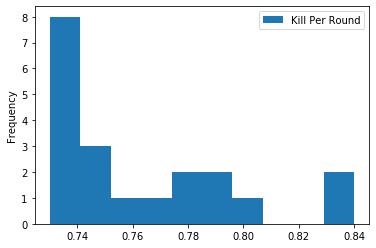

In [32]:
df[df['Kill Per Round'] >= .73].plot(y='Kill Per Round', kind='hist');

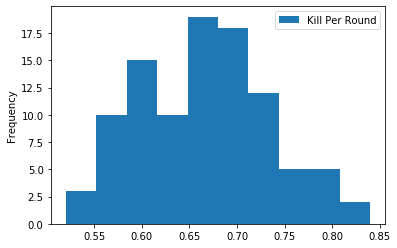

In [33]:
df.plot(y='Kill Per Round', kind='hist');

In [34]:
df['Kill Per Round'].describe()

count    99.000000
mean      0.664747
std       0.069713
min       0.520000
25%       0.605000
50%       0.660000
75%       0.710000
max       0.840000
Name: Kill Per Round, dtype: float64

# Analysis

Above I once again plotted histograms of the top 20 players in KPR, all the players in terms of KPR, and also included some descriptive statistics. Whats interesting to note is that both the median and the mean seem to find themselves at roughly .66. Anything from .71 above seems to be statistically impressive, with top twenty players ranging from .84 to .73 in terms of KPR 

In [36]:
sorted_by_k_d_diff.head(20) #Very similar to the K/D list but switches up a bit as players like #S1mple fall down the list due to their 
#general inactive nature over the last three months

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
98,ZywOo,1334,981,1.36,0.83,836,353,237,134,1.77,...,222,91,26,4,434,570,63,247,18,7
89,Twistzz,1525,1190,1.28,0.75,1003,335,155,164,0.95,...,277,82,23,3,1180,12,21,286,16,14
25,EliGE,1618,1318,1.23,0.79,1041,300,260,229,1.14,...,295,99,24,3,1291,7,83,218,13,6
62,NAF,1446,1258,1.15,0.71,977,188,213,147,1.45,...,262,71,19,2,861,245,69,252,21,4
49,kennyS,902,729,1.24,0.75,593,173,143,91,1.57,...,165,55,10,1,190,545,8,138,13,8
77,s1mple,560,401,1.40,0.84,349,159,90,57,1.58,...,104,41,7,1,193,258,16,85,4,4
75,ropz,638,488,1.31,0.74,437,150,69,49,1.41,...,93,39,10,0,505,9,13,109,3,0
92,woxic,636,498,1.28,0.74,418,138,103,68,1.51,...,119,40,5,1,155,374,6,94,6,1
15,Brehze,1124,991,1.13,0.77,752,133,161,143,1.13,...,188,61,18,2,885,12,22,201,5,1
6,allu,813,708,1.15,0.73,566,105,144,79,1.82,...,144,41,7,0,206,438,34,109,15,11


In [37]:
sorted_by_k_d_diff.tail(20)

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
43,jkaem,627,694,0.90,0.66,433,-67,135,133,1.02,...,118,32,4,0,484,1,24,101,8,10
35,gade,587,655,0.90,0.61,389,-68,87,122,0.71,...,107,32,9,0,468,2,24,82,5,6
85,tarik,955,1026,0.93,0.65,660,-71,144,154,0.94,...,166,54,7,0,660,74,57,151,8,5
26,es3tag,468,540,0.87,0.60,326,-72,81,95,0.85,...,85,24,3,0,214,146,10,77,14,7
64,NBK-,1063,1139,0.93,0.66,696,-76,203,236,0.86,...,186,60,19,1,704,85,70,166,7,32
48,karrigan,516,593,0.87,0.60,354,-77,92,125,0.74,...,69,37,5,1,337,27,43,89,8,12
54,Lekr0,384,462,0.83,0.60,262,-78,54,47,1.15,...,55,26,5,0,240,49,10,78,5,3
94,xseveN,665,743,0.90,0.59,464,-78,89,97,0.92,...,118,28,9,0,436,23,75,123,6,2
63,NaToSaphiX,397,475,0.84,0.59,280,-78,54,57,0.95,...,79,16,2,0,218,82,15,80,3,0
4,Aleksib,666,749,0.89,0.59,468,-83,76,110,0.69,...,117,34,3,1,447,17,74,112,14,4


# Analysis
Over here above us we bare witness to the top 20 players in terms of K / D differnetial and the bottom 20 players in terms of K / D Differentials. What immediately pops out to me in temrs of the bottom ranked players is that not all of them are low skill players. It seems that some of them are skilled players who simply take a heavy entry role on their teams. Players like NBK, and Jkaem are in the triple digits in terms of opening kills. It has always seemed by common intuition that entry fraggers will suffer in terms of statistical output, simply due to the nature of being the first man in versus extremely skilled professionals, and that intuition seems to be backed up by statistical results as skilled aggressive players like Jkaem, Gade, Tarik, and NBK all find themselves in the bottom twenty. 

While what I previously stated in regards to not all bottom twenty players being of a low skill nature still rings true I must also acknowledge that a fair amount of players finding themselves here are also simply just low skill fraggers, especially numerous IGL's who find themselves here. Players like daps, NEO, Zeus, Karrigan, are all individuals who provide low fragging output on their teams, while also functioning as IGL's (though admittedly at varying levels of success). 

One last thing that stood out to me in regards to the bottom ranked players was the presence of four individuals from Renegades within the list. While we can point to a player like Jkaem and point to his high volume of opening kill's as an explanatory factor in regards to his lower K/D it is hard to justify every other player from his team other than JKS being ranked lower than him. This is especially troubling because over that time period JKS has himself maintained a statistically impressive levle of performance, just barely finding himself ranking outside of the top 20 in terms of kpr with a .72 kpr, one that heightens when taking into account the dysfunctional state of the team in terms of results and fragging output over the last few months. This calls into question exactly how much Renegades benefitted from the initial aug meta, as it seems that ever since the nerf they've had a downturn. My prediction is that unless we see a rapid swing in terms of statistical production from some of these players over the immediate future than there will be some turning points coming up in regards to the roster.

The top end of the top 20 players in terms of K/D differential, contrary to the bottom end of the list, is far less interesting. The list is very similar to the list of top 20 players in terms of K/D ratio, which makes sense, only with ranking changes due to some players having less sample size in terms of games played to generate this differential. For example s1mple s1mple finds himself outside of the top 5 despite his impressive ratio due to the amount of lans that Natus Vincere decided to skip. This is, in my opinion, why we have had more of a discussion in regards to who the actual best player in the world has been as s1mple has had less opportunities to put his skills on display.

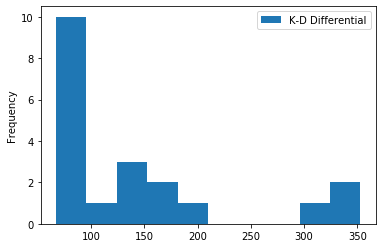

In [38]:
df[df['K-D Differential'] >= 67].plot(y='K-D Differential', kind='hist');

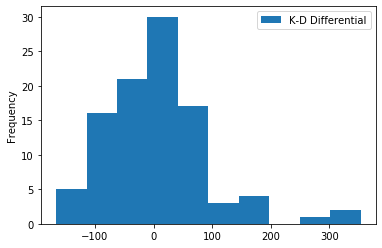

In [39]:
df.plot(y='K-D Differential', kind='hist')

In [40]:
sorted_by_opening_kill_ratio.head(20) #whats interesting at the top of this list are the names that jump to the top of our head
#when we think about the top awpers within the scene. However after those awpers the players that we see jump to the forefront 
#are some of the individuals we think of in terms of more cerebral/complete players, not that they are lacking in skill but that
#they are the type of players who do not generally solely rely on impressive feats of mechanical skill in order to impose their
#presence upon a game.

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
20,coldzera,418,336,1.24,0.79,275,82,49,24,2.04,...,77,23,4,2,307,11,21,77,3,1
6,allu,813,708,1.15,0.73,566,105,144,79,1.82,...,144,41,7,0,206,438,34,109,15,11
22,device,520,427,1.22,0.76,349,93,97,54,1.80,...,95,21,10,1,188,222,16,87,6,1
86,TenZ,132,141,0.94,0.68,95,-9,25,14,1.79,...,25,6,0,0,99,0,1,29,3,0
98,ZywOo,1334,981,1.36,0.83,836,353,237,134,1.77,...,222,91,26,4,434,570,63,247,18,7
77,s1mple,560,401,1.40,0.84,349,159,90,57,1.58,...,104,41,7,1,193,258,16,85,4,4
49,kennyS,902,729,1.24,0.75,593,173,143,91,1.57,...,165,55,10,1,190,545,8,138,13,8
92,woxic,636,498,1.28,0.74,418,138,103,68,1.51,...,119,40,5,1,155,374,6,94,6,1
90,valde,640,624,1.03,0.66,440,16,87,59,1.47,...,122,27,8,0,509,2,40,79,11,0
44,jks,681,635,1.07,0.72,466,46,101,69,1.46,...,116,38,5,2,458,55,35,121,13,1


In [41]:
sorted_by_opening_kill_ratio.tail(20)

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
38,Gratisfaction,336,419,0.80,0.54,241,-83,53,67,0.79,...,54,16,3,0,86,185,2,63,0,0
76,RpK,957,1053,0.91,0.59,661,-96,104,131,0.79,...,153,53,11,1,727,4,61,157,8,1
42,JaCkz,808,845,0.96,0.67,530,-37,136,179,0.76,...,148,42,14,1,598,4,72,123,4,8
51,koosta,347,404,0.86,0.61,236,-57,53,71,0.75,...,72,15,3,0,235,27,21,52,3,9
82,stavn,558,558,1.00,0.71,365,0,67,90,0.74,...,96,32,7,3,397,13,28,109,8,4
48,karrigan,516,593,0.87,0.60,354,-77,92,125,0.74,...,69,37,5,1,337,27,43,89,8,12
11,AZR,543,674,0.81,0.57,389,-131,67,91,0.74,...,85,30,3,0,380,19,37,98,7,3
8,apEX,1061,1081,0.98,0.66,729,-20,116,158,0.73,...,204,49,10,0,804,18,68,153,20,1
21,daps,639,805,0.79,0.52,464,-166,78,107,0.73,...,111,29,2,0,421,20,87,99,13,1
14,Boombl4,236,256,0.92,0.62,167,-20,36,49,0.73,...,41,11,2,0,168,13,7,39,3,6


# Analysis
Above there is a list of the top twenty players in terms of Opening Kill Ratio, and a list of the worst twenty. Opening Kill ratio is basically Total Opening Kills / Total Opening Deaths.  What's immediately pops out to me is the fact that the top ten in terms of Opening Kill Ratio seems to also function as the who's who of top end awpers. This completely makes sense as a skilled awper, if also facilitated and allowed to go for aggressive picks, has the ability to create an untraded opening pick like no other. Allu, Device, and ZywOo comprise three of the top five and are followed closely behind by s1mple, KennyS, and woxic. One needs to look no further than the 11th-20th ranked players to see notable awpers like Cerq, Guardian, and Nitro pop up.

Another interesting inclusion in the list is JKS's present at the tenth spot. This is impressive as, once again, there are more than one member from the Renegades at the bottom end of the list, Azr and Gratisfactoin acquiring the dubious distinction of being the 20th and 14th worst players in terms of Opening Kill Ratio. JKS's ability to maintain such a strong statistical performance across the board, despite the struggles of his dysfunctional team, must be lauded. After all every Counter Strike player knows through experience how difficult it actually is to maintain strong output with the team crumbling around you.

One other feature of interest that stands out to me is stanislaw's production. Immediately I would caution you to take it all with a grain of salt as he has only just recently joined the team, needs some time to settle in, and also has some of the lowest sample size in terms of games played to judge off of. Conversely however I would also like to point out that he has also been the beneficiary of playing alongside one of the most stable rosters in the scene, and has had the opportunity of a few top four finishes at respectable lans. Stanislaw finds himself placing as the second worst player in terms of Opening Kill Ratio with a whopping .52 OKR, only surpassed in terms of disappointment by NEO who has a .51 ratio. This is only fairly early into the stanislaw tenure within NRG, but when one takes into account that he was specifically brought in for the uptick in statistical production over Daps, alongside with his knowledge on how to split bomb sites, we can hardly point to his initial individual results as very promising. Furthermore when he only has a slightly more impressive .83 K/D as compared to daps paltry .79 k/D. On the other hand however this poor start to stanislaw's tenure might actually be the key to abating NRG's stagnation, as if he manages to actually bring to the table what everyone knows he is capable of in terms of statistical output, as the turnaround might be the exact incremental tick that NRG needs to get over the plateau it is undoubtedly experiencing.

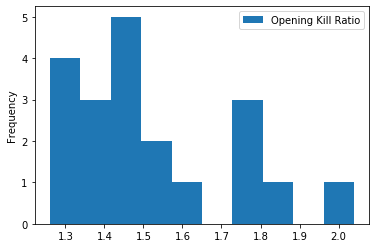

In [42]:
df[df['Opening Kill Ratio'] >= 1.26].plot(y='Opening Kill Ratio', kind='hist');

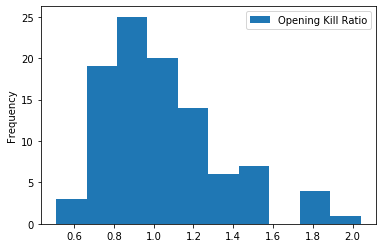

In [43]:
df.plot(y='Opening Kill Ratio', kind='hist');

In [44]:
sorted_by_opening_kill_rating.head(20)

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
61,MSL,163,178,0.92,0.65,109,-15,44,36,1.22,...,29,8,3,0,37,96,4,21,5,1
98,ZywOo,1334,981,1.36,0.83,836,353,237,134,1.77,...,222,91,26,4,434,570,63,247,18,7
22,device,520,427,1.22,0.76,349,93,97,54,1.80,...,95,21,10,1,188,222,16,87,6,1
9,arT,641,650,0.99,0.71,419,-9,164,185,0.89,...,122,39,6,1,256,235,52,76,9,16
60,mixwell,114,129,0.88,0.59,80,-15,29,23,1.26,...,15,8,1,0,26,62,8,15,2,1
77,s1mple,560,401,1.40,0.84,349,159,90,57,1.58,...,104,41,7,1,193,258,16,85,4,4
86,TenZ,132,141,0.94,0.68,95,-9,25,14,1.79,...,25,6,0,0,99,0,1,29,3,0
6,allu,813,708,1.15,0.73,566,105,144,79,1.82,...,144,41,7,0,206,438,34,109,15,11
46,JW,849,827,1.03,0.73,567,22,168,139,1.21,...,160,46,10,0,406,241,27,147,11,17
41,huNter,391,326,1.20,0.80,253,65,64,45,1.42,...,83,21,3,1,289,5,22,65,3,9


In [45]:
sorted_by_opening_kill_rating[['Name','Opening Kill Rating']].head(20) #whats interesting about this list is that mostly it seemms
#to correlate with those individuals who we think of in terms of having some of the more impressive aimers. But also MSL finds himself at the top of the list.
#MSL's presence at the top of the list is most likely a subsequent result of the low sammple size of games, comparaitvely to others.
#Zywoo, device, s1mple continue to statistically impress as usual. Arts presence is interesting, and most likely plays a huge
#part in the rapid ascent that Furia has had to the upper echelons of the scene recently. What will be interesting to note in the
#immediate future is whether or not he will be ablet o maintain such an impressive level of production, as if he does not this could be
#one of the reasons that furia begins to fall off in the future.

,Name,Opening Kill Rating
61,MSL,1.31
98,ZywOo,1.26
22,device,1.24
9,arT,1.23
60,mixwell,1.22
77,s1mple,1.20
86,TenZ,1.19
6,allu,1.19
46,JW,1.19
41,huNter,1.17


In [46]:
sorted_by_opening_kill_rating.tail(20)

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
91,VINI,540,651,0.83,0.60,372,-111,81,116,0.70,...,93,30,5,0,414,10,23,72,5,18
82,stavn,558,558,1.00,0.71,365,0,67,90,0.74,...,96,32,7,3,397,13,28,109,8,4
84,TACO,499,558,0.89,0.58,362,-59,67,82,0.82,...,83,27,0,0,331,44,41,78,6,0
53,KSCERATO,634,553,1.15,0.70,422,81,57,53,1.08,...,127,33,5,1,454,19,51,96,11,6
87,TeSeS,98,106,0.92,0.60,72,-8,12,15,0.80,...,15,4,1,0,77,1,1,19,0,0
58,Lucky,688,806,0.85,0.57,492,-118,99,145,0.68,...,103,31,9,1,531,3,53,94,7,1
73,refrezh,147,147,1.00,0.59,102,0,15,16,0.94,...,26,6,1,1,111,2,11,23,0,0
33,friberg,495,545,0.91,0.63,326,-50,60,87,0.69,...,84,32,7,0,355,4,36,91,7,3
11,AZR,543,674,0.81,0.57,389,-131,67,91,0.74,...,85,30,3,0,380,19,37,98,7,3
8,apEX,1061,1081,0.98,0.66,729,-20,116,158,0.73,...,204,49,10,0,804,18,68,153,20,1


In [47]:
sorted_by_opening_kill_rating[['Name', 'Opening Kill Rating']].tail(20)

,Name,Opening Kill Rating
91,VINI,0.90
82,stavn,0.90
84,TACO,0.90
53,KSCERATO,0.88
87,TeSeS,0.88
58,Lucky,0.88
73,refrezh,0.86
33,friberg,0.86
11,AZR,0.86
8,apEX,0.86


# Analysis
Immediately there is one thing that leaps out to me, the presence of arT so high up on the list. He placed fourth on the list of top players according to opening kill rating, whilst also maintaining a negative K-D Differential and also finishing with a negative differential in terms of opening kills versus opening deaths. I believe that this interesting duality within his statistics speaks to the playstyle that he favors within the server. arT, and Furia in general, seem to play an ultra high aggression playstyle, and arT himself seems to stand at the forefront of this wave of aggression. The negative kill differential between his opening kills, and the fact that it doesn't affect his opening kill rating, tells me that he manages to output a high level of opening damage via smart aggression regardless of the negative consequences that his ultra aggression can have on his k/d. However over this previous three month period he has been unusually impactful in terms of opening up, after all he's found himself placing higher than players like s1mple, Elige, and woxic on this list. I don't think that arT's high statistical production in ths sense was uncorrelated with Furia's sudden rise to, at one point, being top 5 in the world rankings. If arT's production begins to level off then I believe there is a chance we could see Furia plateauing at a level a few ticks lower than the level they initially promised to deliver at. Furia's play, and at a more specific level arT's play, is a point of interest to keep an eye on moving into the next few lans.

In [50]:
sorted_by_first_kill_in_won_rounds.head(20)

,Name,Kills,Deaths,K / D,Kill Per Round,Rounds With Kills,K-D Differential,Total Opening Kills,Total Opening Deaths,Opening Kill Ratio,...,2 Kill Rounds,3 Kill Rounds,4 Kill Rounds,5 Kill Rounds,Rifle Kills,Sniper Kills,SMG Kills,Pistol Kills,Grenade,Other
9,arT,641,650,0.99,0.71,419,-9,164,185,0.89,...,122,39,6,1,256,235,52,76,9,16
60,mixwell,114,129,0.88,0.59,80,-15,29,23,1.26,...,15,8,1,0,26,62,8,15,2,1
43,jkaem,627,694,0.90,0.66,433,-67,135,133,1.02,...,118,32,4,0,484,1,24,101,8,10
61,MSL,163,178,0.92,0.65,109,-15,44,36,1.22,...,29,8,3,0,37,96,4,21,5,1
86,TenZ,132,141,0.94,0.68,95,-9,25,14,1.79,...,25,6,0,0,99,0,1,29,3,0
98,ZywOo,1334,981,1.36,0.83,836,353,237,134,1.77,...,222,91,26,4,434,570,63,247,18,7
46,JW,849,827,1.03,0.73,567,22,168,139,1.21,...,160,46,10,0,406,241,27,147,11,17
31,fer,618,593,1.04,0.72,410,25,116,109,1.06,...,113,30,9,2,475,11,41,84,5,3
74,REZ,432,464,0.93,0.67,277,-32,84,79,1.06,...,65,32,6,2,340,21,9,62,1,0
22,device,520,427,1.22,0.76,349,93,97,54,1.80,...,95,21,10,1,188,222,16,87,6,1


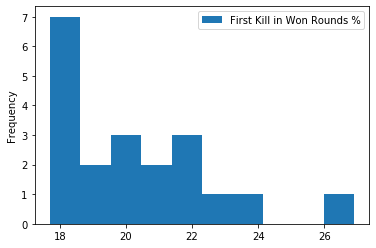

In [51]:
df[df['First Kill in Won Rounds %'] >= 17.7].plot(x='Name', y='First Kill in Won Rounds %', kind='hist')

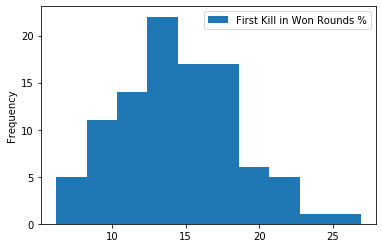

In [52]:
df.plot(x='Name', y='First Kill in Won Rounds %', kind='hist')

In [53]:
sorted_by_first_kill_in_won_rounds[['Name', 'First Kill in Won Rounds %']].head(20) #Once again what is interesting about this list is that a player like
#Art is the top of the list. Considering his position on the list it becomes clear to me that his aggression has had a large impact
#on Furia's success over the last few months. What will be interesting to see is whether or not he will be ablle to continue to keep his results up
#A potential downswing in his level of performance might play a role in Furia falling down a few spots down the rankings.

,Name,First Kill in Won Rounds %
9,arT,26.9
60,mixwell,23.9
43,jkaem,22.3
61,MSL,22.2
86,TenZ,21.6
98,ZywOo,21.4
46,JW,21.2
31,fer,20.5
74,REZ,20.3
22,device,20.2


In [54]:
sorted_by_first_kill_in_won_rounds[['Name', 'First Kill in Won Rounds %']].tail(20)

,Name,First Kill in Won Rounds %
33,friberg,10.8
97,Zeus,10.8
75,ropz,10.7
40,HUNDEN,10.4
4,Aleksib,10.3
95,Xyp9x,10.1
76,RpK,10.0
8,apEX,9.8
89,Twistzz,9.8
82,stavn,9.7


# Analysis
The first thing that immediately jumped out to me was the ludicrous impact that arT has had on won rounds. He is the only person within the entire top twenty community to have over a twenty five percent impact in terms of First Kill on Won Rounds %. This is extremely impressive considering that at a bird's eye view the rest of arT's teammates also utilize an aggressive playstyle. It quickly becomes clear to me that arT has been one of the main driving points behind Furia's statistically impressive results, in terms of placings, over the past few months. I will eagerly look forward to seeing whether or not he will be able to keep up this high level of play over the next few months.

Another seemingly random statistic that caught my eye was Twistzz low placing within the list, finishing with a 9.8% FK in Won Rounds. This surprised me as colloquially Twistzz has been attributed as an dedicated entry fragger within the context of the Team Liquid system. I think that this low placing goes to speak to the depth of the role diversity within Team Liquid, and how it seems that the entire team has been let off the leash and allowed to go aggressive as they see fit, and as such this leads to larger variability in terms of what role each player takes.